Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# EKONOMIJA
## 24.03.2020. 

# Stefan Brankovic

***

<font color='red'>
Preimenovati svesku: File/Rename u __ekonomija_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb)</font>

***

#### __Zadatak 1__: Dinamički model
Za malu porodičnu piceriju funkcije ponude i potražnje su linearne funkcije cene: $Q_d(P) = A - BP$ i $Q_s(P) = -C + DP$, gde je $A = 22$ pice po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 7$ pica po danu po evru.

a) Formirati Python skriptu koja prema algoritmu sa slajdova, za definisane funkcije ponude i potražnje pronalazi stacionarno stanje $P_{eq}$. Na istom grafiku nacrtati funkcije $Q_d(P)$ i  $Q_s(P)$. Označiti ose grafika. 

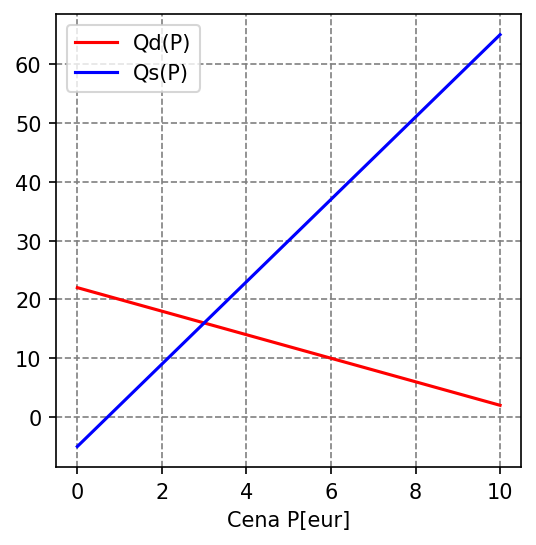

3.0


In [1]:
Qd = lambda P, A, B: A - B * P
Qs = lambda P, C, D: -C + D * P
f = lambda P, A, B, C, D: Qd(P, A, B)- Qs(P, C, D)

import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import scipy

P = np.linspace(0, 10, 3000)
A, B, C, D = 22, 2, 5, 7
plt.figure(figsize = (4, 4), dpi = 150)
plt.plot(P, Qd(P,A,B), "r-",label="Qd(P)")
plt.plot(P, Qs(P,C, D), "b-", label = "Qs(P)")
plt.xlabel('Cena P[eur]')
plt.grid(b=True, which='both', color='grey',linestyle='--')
plt.legend()
plt.show()

znak = np.sign(f(P, A, B, C, D))
razlike = np.diff(znak)
nule = np.where(razlike != 0 )[0]
Peq = [scipy.optimize.newton(f, P[nule[ink]], args = (A, B, C, D)) for ink in range(len(nule))]
for ink in range(len(Peq)):
  print(Peq[ink])

b) Formirati Python definiciju (<font color='blue'>dinamicki_model</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Dinamika cene opisana je trenutnom razlikom između funkcije ponude i potražnje kao:

<br>
\begin{equation}
    \frac{dP(t)}{dt} = \gamma(Q_d(P) - Q_s(P)) = -\gamma(B + D)P(t) + \gamma(A + C)
\end{equation}
<br>

gde je faktor korelacije $\gamma = 0.1$ u odgovarajućim jedinicama. 
Koeficijenti $A$, $B$, $C$, $D$ i $\gamma$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [0]:
def dinamicki_model(P, gama, y, A, B, C, D):
  return -y*(B + D)* P + y * (A + C)

gama = 0.1

c) Formirati Python skriptu koja rešava diferencijalnu jednačinu i iscrtava njena rešenja. Na istom grafiku prikazati dinamiku cene za tri moguća slučaja: početna cena $P(0)$ jednaka je ravnotežnoj ceni ($P(0) = P_{eq}$), početna cena je veća od ravnotežne ($P(0) = 2P_{eq}$) i početna cena je manja od ravnotežne cene ($P(0) = 0.5P_{eq}$). Za definisane parametre i početne uslove, rešavati diferencijalnu jednačinu na vremenskom domenu od $0$ do $10$ dana u $1000$ ekvidistantnih tačaka. Na istom grafiku, različitim bojama (plavom, crvenom i zelenom), nacrtati profile $P(t)$ za sva tri slučaja početnih uslova. Označiti ose grafika i ubaciti legendu.

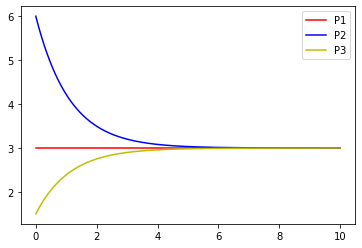

In [3]:
P0 = 3
P1 = P0
P2 = 2 * P0
P3 = 0.5 * P0
t = np.linspace(0, 10, 1000)

sol1 = integrate.odeint(dinamicki_model, P1, t, args=(gama, A, B, C, D))
sol2 = integrate.odeint(dinamicki_model, P2, t, args=(gama, A, B, C, D))
sol3 = integrate.odeint(dinamicki_model, P3, t, args=(gama, A, B, C, D))

plt.plot(t, sol1, 'r', label="P1")
plt.plot(t, sol2, 'b', label="P2")
plt.plot(t, sol3, 'y', label="P3")
plt.xlabel=("vreme")
plt.ylabel=("dinamika cene")
plt.legend()
plt.show()

d) Da li sistem ima stabilnu dinamiku? Šta se dešava sa cenom posle dovoljno dugog vremena? Da li se dostiže predviđeno stacionarno stanje? 

U prvom slucaju pocetni uslov je jednak trazenom stacionarnom stanju, pa se dinamika sistema ne menja; u drugom slucaju pocetni uslov je duplo veci, pa se cena smanjuje dok ne dodje do Peq, dok u P3 raste do Peq jer je p.s duplo manje. Dakle, sistem ima stabilnu dinamiku jer posle dovoljno dugogog vremena sistem uvek dostize stacionarno stanje.

***
<font color='red'>Snimiti aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimiti fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 2__: Model sa očekivanjima cena

a) Na primeru porodične picerije sa slajdova primeniti kompleksniji model koji uključuje modelovanje očekivanja cene od strane potraživača. U takvom modelu funkcija potražnje $Q_d$ zavisi i od promene cene, kao i od brzine njene promene:

<br>
\begin{equation}
    Q_d = A - BP + M\frac{dP}{dt} + N\frac{d^2P}{dt^2},\\
    Q_s = -C + DP.
\end{equation}
<br>

Diferencijalna jednačina koja opisuje promenu cene proizvoda u ovakvom modelu i koju treba rešavati dobija se izjednačavanjem $Q_d = Q_s$ i ima formu:

<br>
\begin{equation}
    \frac{d^2P}{dt} + \frac{M}{N}\frac{dP}{dt} - \frac{B+D}{N}P = -\frac{A+C}{N}.
\end{equation}
<br>


Formirati Python definiciju (<font color='blue'>ocekivanja_cene</font>) koja predstavlja odgovarajuću diferencijalnu jednačinu kojom je opisana dinamika cene. Koeficijenti $A$, $B$, $C$, $D$, $M$ i $N$ treba da budu pozivni parametri definicije koja predstavlja diferencijalnu jednačinu.

In [0]:
def ocekivanja_cene(gama, t, A, B, C, D, M, N):
  y1, y2 = gama
  return y2, y1*(B + D)/N - (A + C)/N - M/N * y2

b) Ispitati i diskutovati dinamiku sistema za slučaj sledećih parametara:
<ol>
<li>$A = 42$ pice po danu, $B = 4$ pice po danu po evru, $C = 6$ pica po danu, $D = 8$ pica po danu po evru, $M = –4$ pice po evru, $N = 1$ (u odgovarajućim jedinicama), $P(0) = 6$ evra, $dP/dt(0) = 4$ evra po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li> 
<br>    
    
<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = –2$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
<br> 

<li>$A = 40$ pica po danu, $B = 2$ pice po danu po evru, $C = 5$ pica po danu, $D = 3$ pice po danu po evru, $M = 0.5$ pice po evru, $N = –1$ (u odgovarajućim jedinicama), $P(0) = 12$ evra, $dP/dt(0) = 1$ evro po danu. Rešavati na vremenskom domenu od $0$ do $20$ dana u $1000$ ekvidistantnih tačaka.</li>
</ol>
Za svaki od tri slučaja na jednom subplot-u nacrtati i vremenski ($P$ u funkciji od $t$) i fazni dijagram ($dP/dt$ u funkciji od $P$) dinamike cene.  

<Figure size 576x432 with 0 Axes>

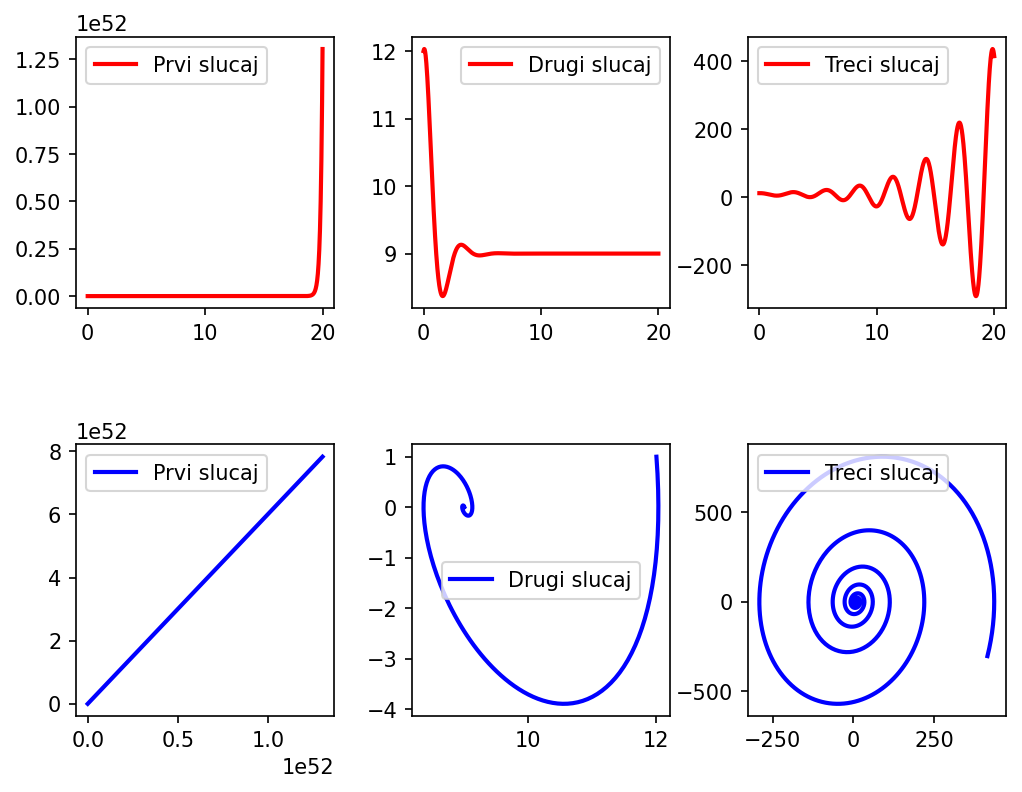

In [9]:
A, B, C, D, M, N = 42, 4, 6, 8, -4, 1
P0, dPdt = 6, 4
t = np.linspace(0, 20,1000)
plt.figure(figsize=(8, 6))
P01 = integrate.odeint(ocekivanja_cene, [P0,dPdt], t, args=(A, B, C, D, M, N))

A, B, C, D, M, N = 40, 2, 5, 3, -2, -1
P0, dPdt = 12, 1
t=np.linspace(0, 20,1000)
P02=integrate.odeint(ocekivanja_cene, [P0,dPdt], t, args=(A, B, C, D, M, N))

A, B, C, D, M, N=40, 2, 5, 3, 0.5, -1
P0, dPdt = 12, 1
t=np.linspace(0, 20,1000)
plt.figure(figsize=(8, 6), dpi = 150)
P03 =integrate.odeint(ocekivanja_cene, [P0,dPdt], t, args=(A, B, C, D, M, N))

plt.subplot(2, 3, 1)
plt.plot(t, P01[:,0], color="red", linewidth=2, linestyle="-",label="Prvi slucaj")
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(t, P02[:,0], color="red", linewidth=2, linestyle="-",label="Drugi slucaj")
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(t, P03[:,0], color="red", linewidth=2, linestyle="-",label="Treci slucaj")
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(P01[:,0], P01[:,1], color="blue", linewidth=2, linestyle="-",label="Prvi slucaj")
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(P02[:,0], P02[:,1], color="blue", linewidth=2, linestyle="-",label="Drugi slucaj")
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(P03[:,0], P03[:,1], color="blue", linewidth=2, linestyle="-",label="Treci slucaj")
plt.legend()

plt.subplots_adjust(hspace = .5, wspace = .3)
plt.show()









c) Na osnovu analize stabilnosti sa slajdova, komentarisati očekivane rezultate dinamike sa dobijenim graficima. 
U kom slučaju je dinamika stabilna, u kom nestabilna i zašto? 
Komentarisati fazne dijagrame. Kojoj vrsti oscilacija odgovara ovakav model? 
Šta bi, prema analogiji sa fizikom, bio najbolji mogući slučaj za dinamiku cene? Predložiti neke vrednosti za parametre $B$, $D$, $M$ i $N$ tako da dinamike cene bude optimalna. Nacrtati grafik takve dinamike cene.

No handles with labels found to put in legend.


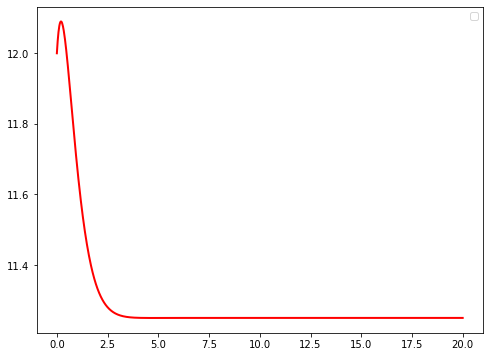

In [15]:
M1, N1, A1, B1, C1, D1 = -3.75, -1, 40, 1, 5, 3
t=np.linspace(0, 20,1000)
P0=12
dPdt=1
P_t=integrate.odeint(ocekivanja_cene, [P0,dPdt], t, args=(A1, B1, C1, D1, M1, N1))
plt.figure(figsize=(8, 6))
plt.plot(t, P_t[:,0], color="red", linewidth=2, linestyle="-")

plt.legend()
plt.show()

Jedini sistem od prethodna tri koji ima stabilnu dinamiku je drugi jer jedini posle dovoljno drugog vremene postize ravnotezu. Prvi i treci iako se u pocetku nalaze u stacionarnoj tacki posle nekog vremena naglo eksplodiraju. Na primer, drugi i treci slucaj predstavljaju slabo prigusene oscilacije (s tim sto je 2. blizu kriticnim), ali zbog negativnog faktora prigusenja u trecem slucaju kriva sa vremenom sve vise raste. Iz fizickog aspekta najbolji moguci slucaj bi predstavljala kriticno prigusene oscilacije sa pozitivnim faktorom alfa, koje sam pokusao priblizno da dobijem u gornjem grafiku.